<h1>MARKET RECOMMENDATION ENGINE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori

Data Downloaded from : https://www.kaggle.com/roshansharma/market-basket-optimization

<h2>Data Analysis

In [2]:
market_data = pd.read_csv("Market_Basket_Optimisation.csv",header=None)
# market_data.head(20)
len(market_data)

7501

In [3]:
market_data=market_data.T
market_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500
0,shrimp,burgers,chutney,turkey,mineral water,low fat yogurt,whole wheat pasta,soup,frozen vegetables,french fries,...,herb & pepper,chocolate,burgers,turkey,pancakes,butter,burgers,chicken,escalope,eggs
1,almonds,meatballs,NaN,avocado,milk,NaN,french fries,light cream,spaghetti,NaN,...,NaN,escalope,salmon,burgers,light mayo,light mayo,frozen vegetables,NaN,green tea,frozen smoothie
2,avocado,eggs,NaN,NaN,energy bar,NaN,NaN,shallot,green tea,NaN,...,NaN,NaN,pancakes,dessert wine,NaN,fresh bread,eggs,NaN,NaN,yogurt cake
3,vegetables mix,NaN,NaN,NaN,whole wheat rice,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,french fries,shrimp,NaN,NaN,french fries,NaN,NaN,low fat yogurt
4,green grapes,NaN,NaN,NaN,green tea,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,frozen smoothie,pasta,NaN,NaN,magazines,NaN,NaN,NaN


In [4]:
# Making a dictionary of the number of items bought by users in a single purchase and its frequency
items_bought_by_users={}
for i in range(0,7501):
    x=market_data[i].count()
    if x in items_bought_by_users.keys():
        items_bought_by_users[x]+=1
    else:
        temp={x:1}
        items_bought_by_users.update(temp)
# Making a DataFrame from the above dictionary
items_bought_by_users = pd.DataFrame(items_bought_by_users,index=['frequency'])
items_bought_by_users = items_bought_by_users.T
items_bought_by_users

,frequency
20,1
3,1044
1,1754
2,1358
5,665
7,388
10,139
6,495
8,327
9,259


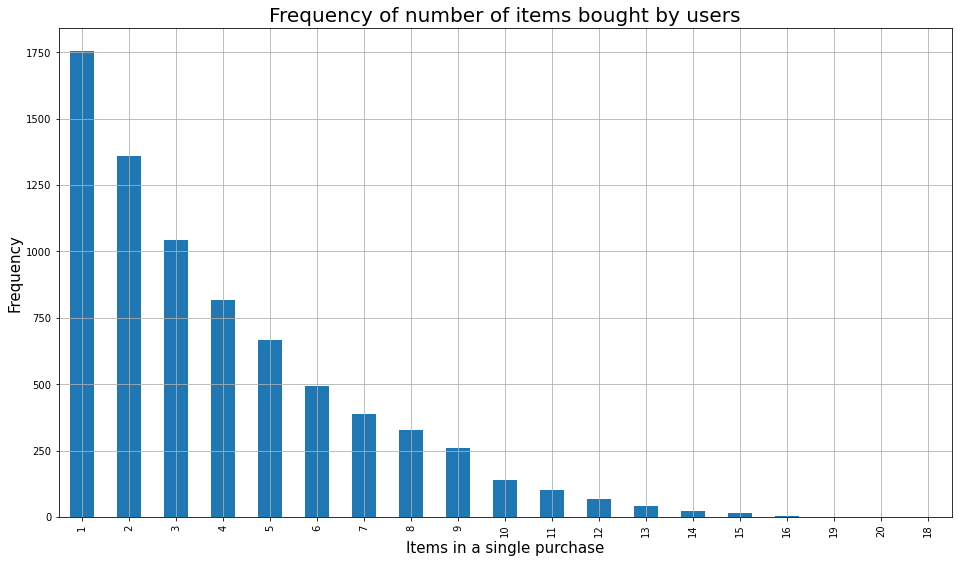

In [5]:
# Plotting the graph of the DataFrame
items_bought_by_users= items_bought_by_users.sort_values(by='frequency',ascending=False)
plt.rcParams['figure.figsize'] = (16,9)
plt.title('Frequency of number of items bought by users', fontsize = 20)
plt.xlabel("Items in a single purchase", size=15)
plt.ylabel("Frequency", size=15)
items_bought_by_users['frequency'].plot.bar()
plt.grid()
plt.show()

In [6]:
market_data=market_data.T
market_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Creating a dictionary with all items and number of times it has been bought by the user
item_frequencies={}
for i in range(len(market_data)):
    for j in range(0,20):
        x=str(market_data.values[i,j])
        if x!= 'nan' :
            if x in item_frequencies.keys():
                item_frequencies[x]+=1
            else:
                temp={x:1}
                item_frequencies.update(temp)
# Creating a DataFrame from above dictionary
item_frequencies = pd.DataFrame(item_frequencies,index=['frequency'])
item_frequencies = item_frequencies.T
item_frequencies = item_frequencies.sort_values(by='frequency',ascending=False)
item_frequencies

,frequency
mineral water,1788
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230
...,...
tea,29
bramble,14
cream,7
napkins,5


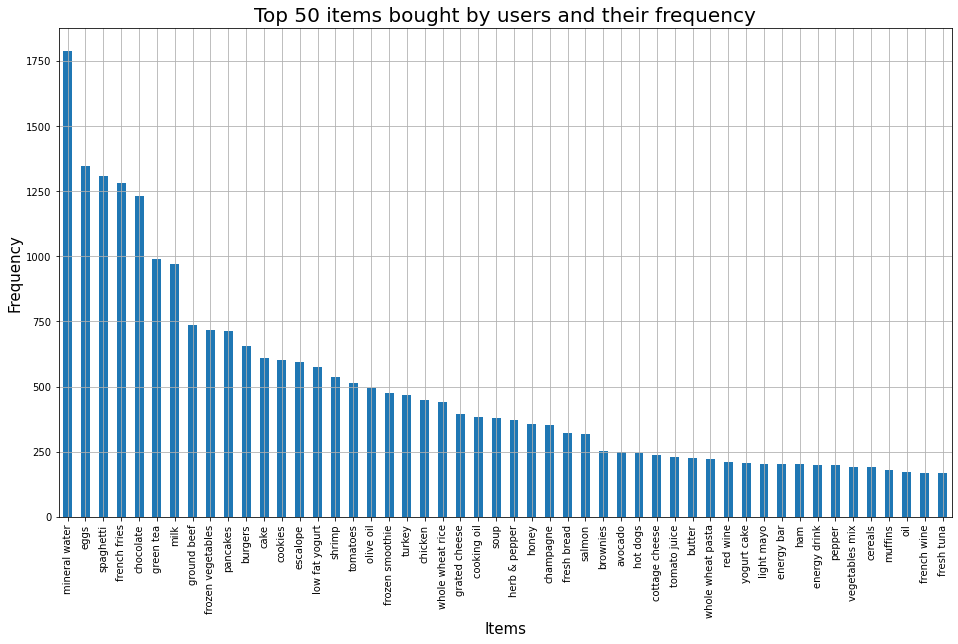

In [8]:
# Plotting a graph of Top 50 items bought by users
plt.rcParams['figure.figsize'] = (16,9)
plt.title('Top 50 items bought by users and their frequency', fontsize = 20)
plt.xlabel("Items", size=15)
plt.ylabel("Frequency", size=15)
item_frequencies.head(50)['frequency'].plot.bar()
plt.grid()
plt.show()

In [9]:
# Average items bought by users in a single purchase
average_items_bought = np.array(market_data.count(axis=1).tolist()).mean()
print(average_items_bought)
# Median of items bought by users in a single purchase
median_items_bought = np.median(np.array(market_data.count(axis=1).tolist()))
print(median_items_bought)

3.914544727369684
3.0


<h2>Recommendation Engine Calculation

In [10]:
# Making a list of lists from the given dataset, excluding all the NaN values
list_market_data = []
for i in range(len(market_data)):
    list_market_data.append([str(market_data.values[i,j]) for j in range(0,20) if str(market_data.values[i,j]) != 'nan'])
list_market_data

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [11]:
# Using the dictionary from above printing all the different items that have been bought by users
item_frequencies = item_frequencies.T
print("All items list : ")
for i in list(item_frequencies.columns):
    print(i)

All items list : 
mineral water
eggs
spaghetti
french fries
chocolate
green tea
milk
ground beef
frozen vegetables
pancakes
burgers
cake
cookies
escalope
low fat yogurt
shrimp
tomatoes
olive oil
frozen smoothie
turkey
chicken
whole wheat rice
grated cheese
cooking oil
soup
herb & pepper
honey
champagne
fresh bread
salmon
brownies
avocado
hot dogs
cottage cheese
tomato juice
butter
whole wheat pasta
red wine
yogurt cake
light mayo
energy bar
ham
energy drink
pepper
vegetables mix
cereals
muffins
oil
french wine
fresh tuna
strawberries
meatballs
almonds
parmesan cheese
mushroom cream sauce
rice
protein bar
mint
white wine
pasta
light cream
carrots
black tea
tomato sauce
fromage blanc
gums
eggplant
melons
extra dark chocolate
body spray
yams
magazines
barbecue sauce
cider
nonfat milk
candy bars
zucchini
whole weat flour
blueberries
salt
flax seed
green grapes
antioxydant juice
bacon
green beans
bug spray
clothes accessories
toothpaste
shallot
strong cheese
spinach
gluten free bar
pet food

In [12]:
# Taking input of the item for which recommendations have to be given
item_bought = input("Enter item : ")

Enter item : cake


In [13]:
# Making a list of lists that contain the above inputted item
final_data = []
for i in list_market_data:
    if item_bought in i:
        final_data.append(i)
# len(final_data)
final_data

[['mineral water', 'cake', 'cottage cheese'],
 ['eggs', 'cake', 'french fries'],
 ['shrimp',
  'pasta',
  'soup',
  'cake',
  'cooking oil',
  'chicken',
  'light mayo',
  'low fat yogurt'],
 ['grated cheese',
  'whole wheat pasta',
  'ground beef',
  'spaghetti',
  'cake',
  'energy drink'],
 ['red wine',
  'spaghetti',
  'mineral water',
  'soup',
  'milk',
  'eggs',
  'cake',
  'gums',
  'cooking oil',
  'chocolate',
  'frozen smoothie'],
 ['turkey', 'tomatoes', 'cake'],
 ['mineral water', 'vegetables mix', 'cake', 'frozen smoothie', 'brownies'],
 ['herb & pepper', 'honey', 'cake', 'rice', 'protein bar'],
 ['soup',
  'energy bar',
  'chicken',
  'eggs',
  'cake',
  'french fries',
  'body spray',
  'strawberries'],
 ['cake', 'frozen smoothie'],
 ['turkey',
  'burgers',
  'ground beef',
  'milk',
  'olive oil',
  'cake',
  'fresh bread'],
 ['eggs', 'whole wheat rice', 'cake', 'green tea', 'escalope'],
 ['fresh tuna',
  'shrimp',
  'pasta',
  'mineral water',
  'olive oil',
  'eggs',


In [14]:
rules = apriori(final_data, min_support = 0.1, min_confidence = 0.50, min_lift = 1)

In [15]:
list_rules = list(rules)
list_rules

[RelationRecord(items=frozenset({'cake'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'cake'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'burgers', 'cake'}), support=0.14144736842105263, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'cake'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'cake', 'chocolate'}), support=0.16776315789473684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'cake'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'cake', 'eggs'}), support=0.23519736842105263, ordered_statistics=[OrderedStatistic(items_base=frozenset({'eggs'}), items_add=frozenset({'cake'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'cake', 'french fries'}), support=0.22039473684210525, ordered_statistics=[OrderedStatistic(items_base=frozenset({'french fries'}), items_add=froze

In [16]:
df_rules = pd.DataFrame(list_rules)
df_rules = df_rules.sort_values(by='support',ascending=False).reset_index(drop=True)
df_rules

,items,support,ordered_statistics
0,(cake),1.000000,"[((), (cake), 1.0, 1.0)]"
1,"(cake, mineral water)",0.338816,"[((mineral water), (cake), 1.0, 1.0)]"
2,"(cake, eggs)",0.235197,"[((eggs), (cake), 1.0, 1.0)]"
3,"(cake, spaghetti)",0.223684,"[((spaghetti), (cake), 1.0, 1.0)]"
4,"(cake, french fries)",0.220395,"[((french fries), (cake), 1.0, 1.0)]"
5,"(cake, green tea)",0.174342,"[((green tea), (cake), 1.0, 1.0)]"
6,"(cake, chocolate)",0.167763,"[((chocolate), (cake), 1.0, 1.0)]"
7,"(cake, milk)",0.164474,"[((milk), (cake), 1.0, 1.0)]"
8,"(cake, pancakes)",0.146382,"[((pancakes), (cake), 1.0, 1.0)]"
9,"(burgers, cake)",0.141447,"[((burgers), (cake), 1.0, 1.0)]"


In [17]:
# Printing top 10 recommendations for the item inputted
rec_num = 10 if len(df_rules)>=11 else len(df_rules)-1
print("Top ", rec_num," recommendations for ",item_bought," are : ")
for i in range(1,rec_num+1):
    print(i,".)",list(df_rules.values[i,2][0][0])[0])

Top  10  recommendations for  cake  are : 
1 .) mineral water
2 .) eggs
3 .) spaghetti
4 .) french fries
5 .) green tea
6 .) chocolate
7 .) milk
8 .) pancakes
9 .) burgers
10 .) frozen vegetables


<h2> Final Recommendation Engine

In [21]:
def recommendation_engine():
    choice = 'Y'
    while choice == 'Y' or choice == 'y':
        item_bought = input("Enter item : ")
        final_data = []
        for i in list_market_data:
            if item_bought in i:
                final_data.append(i)
        rules = apriori(final_data, min_support = 0.1, min_confidence = 0.50, min_lift = 1)
        list_rules = list(rules)
        df_rules = pd.DataFrame(list_rules)
        df_rules = df_rules.sort_values(by='support',ascending=False).reset_index(drop=True)
        rec_num = 10 if len(df_rules)>=11 else len(df_rules)-1
        print("Top ", rec_num," recommendations for ",item_bought," are : ")
        for i in range(1,rec_num+1):
            print(i,".)",list(df_rules.values[i,2][0][0])[0])
        choice=input("check recommendations of another item (Y/N) : ")

In [23]:
recommendation_engine()

Enter item : green tea
Top  10  recommendations for  green tea  are : 
1 .) mineral water
2 .) french fries
3 .) spaghetti
4 .) eggs
5 .) chocolate
6 .) milk
7 .) burgers
8 .) pancakes
9 .) ground beef
10 .) frozen vegetables
check recommendations of another item (Y/N) : y
Enter item : burgers
Top  10  recommendations for  burgers  are : 
1 .) eggs
2 .) mineral water
3 .) french fries
4 .) spaghetti
5 .) milk
6 .) green tea
7 .) chocolate
8 .) ground beef
9 .) cake
10 .) turkey
check recommendations of another item (Y/N) : Y
Enter item : eggs
Top  10  recommendations for  eggs  are : 
1 .) mineral water
2 .) spaghetti
3 .) french fries
4 .) chocolate
5 .) milk
6 .) burgers
7 .) green tea
8 .) frozen vegetables
9 .) pancakes
10 .) ground beef
check recommendations of another item (Y/N) : n
